In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pdp
import sklearn
import xgboost as xgb
import lazypredict

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from scipy.stats import norm
from collections import Counter

from sklearn import tree
from sklearn.metrics import roc_curve
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

C:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
bank_data = pd.read_csv('C:/Users/admin/Desktop/ML Final Project/ML data/data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
bank_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [4]:
print('Financially stable: ',bank_data['Bankrupt?'].value_counts()[0],'companies are financially stable making up ', round(bank_data['Bankrupt?'].value_counts()[0]/len(bank_data) * 100,2), '% of the dataset')
print('Financially unstable: ',bank_data['Bankrupt?'].value_counts()[1],'companies are bankrupt ', round(bank_data['Bankrupt?'].value_counts()[1]/len(bank_data) * 100,2), '% of the dataset')

Financially stable:  6599 companies are financially stable making up  96.77 % of the dataset
Financially unstable:  220 companies are bankrupt  3.23 % of the dataset


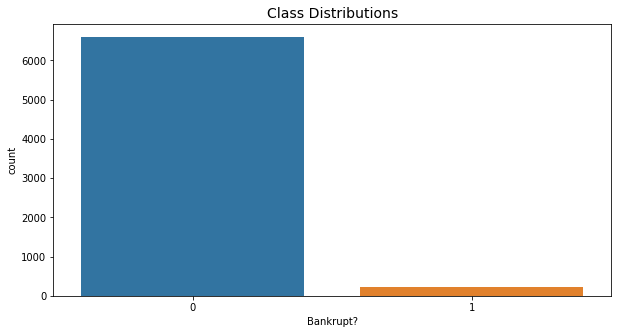

In [5]:
plt.figure(figsize = (10,5))
sns.countplot(bank_data['Bankrupt?'])
plt.title('Class Distributions', fontsize=14)
plt.show()

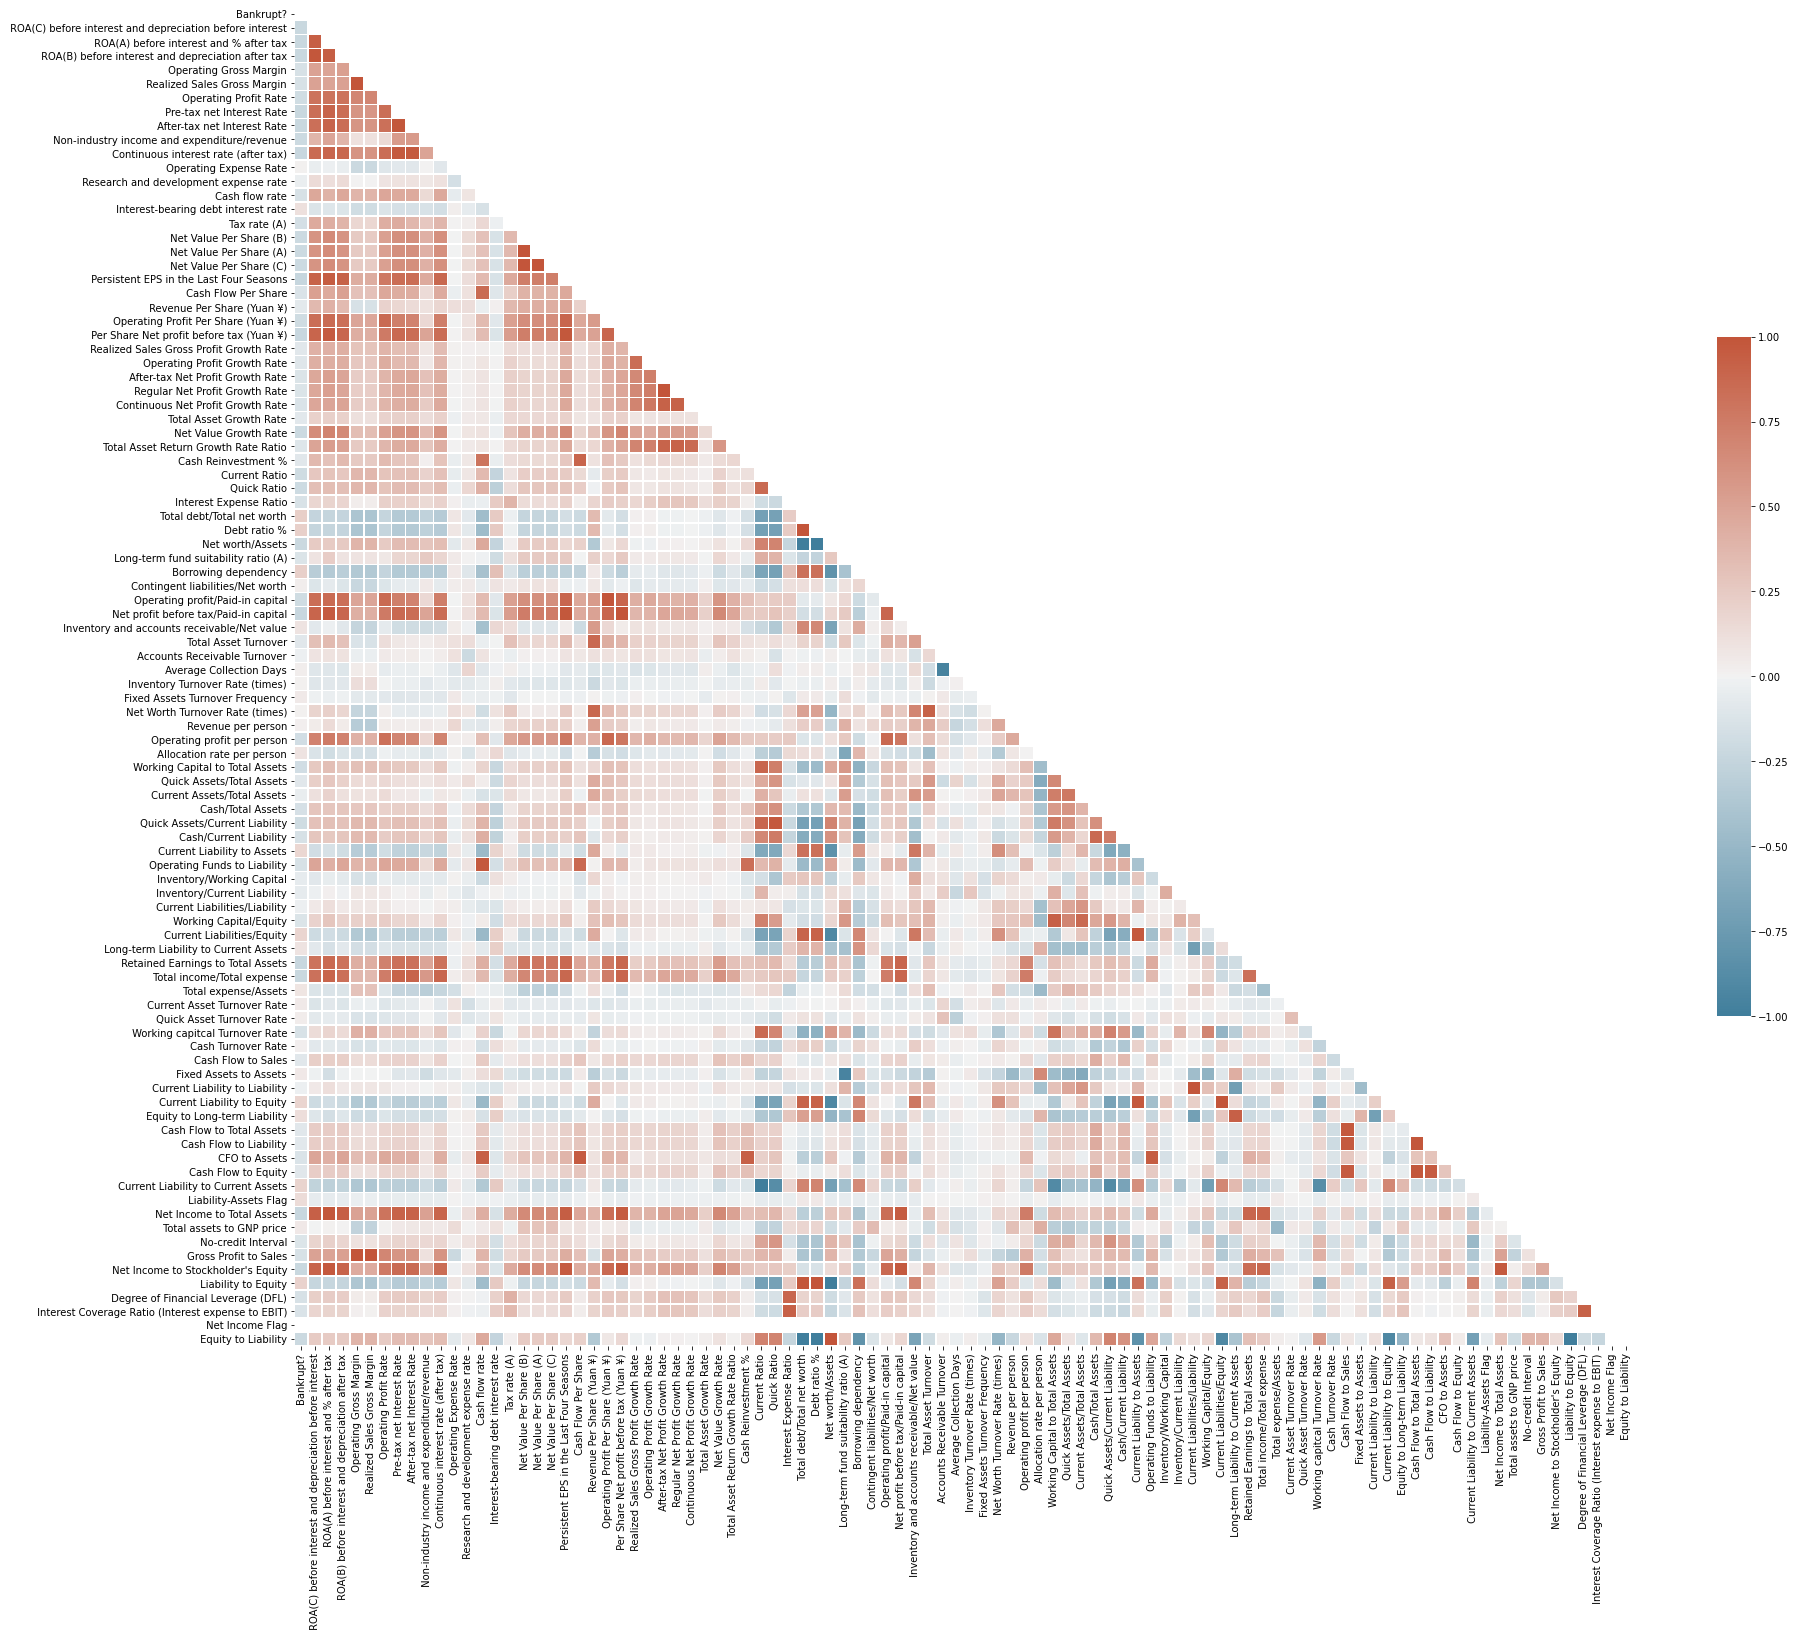

In [6]:
plt.subplots(figsize=(30, 25))
mat = bank_data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [7]:
from dominance_analysis import Dominance
dominance_reg=Dominance(data=bank_data, target='Bankrupt?', top_k=15, objective=1)
incr_variable_rsquare=dominance_reg.incremental_rsquare()

Loading BokehJS ...

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Selecting 15 Best Predictors for the Model
Selected Predictors :  [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Current Liability to Assets', ' Retained Earnings to Total Assets', ' Current Liability to Current Assets', ' Net Income to Total Assets', " Net Income to Stockholder's Equity"]

********************  R-Squared of Complete Model :  ********************
R Squared : 0.14928200851304363

Selecting 15 Best Predictors for the Model
Selected Predictors :  [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Persistent EPS in the Last Four 

  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [08:34<00:00, 36.76s/it]


#########################  Variable Dominance Calculation Done!!!!!  #########################



In [8]:
dominance_reg.plot_incremental_rsquare()

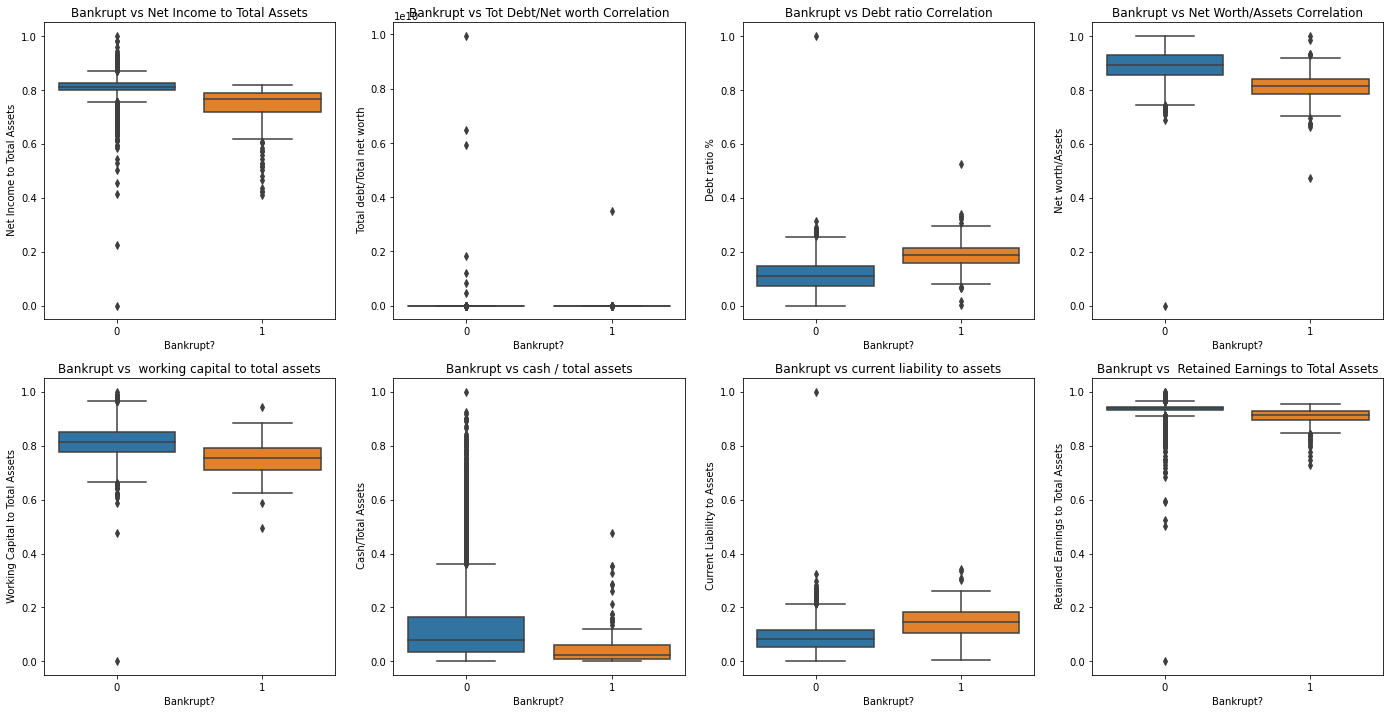

In [9]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(24,12))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=bank_data, ax=axes[0,0])
axes[0,0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=bank_data, ax=axes[0,1]) 
axes[0,1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=bank_data, ax=axes[0,2])
axes[0,2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=bank_data, ax=axes[0,3])  
axes[0,3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=bank_data, ax=axes[1,0])
axes[1,0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=bank_data, ax=axes[1,1])
axes[1,1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=bank_data, ax=axes[1,2])
axes[1,2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=bank_data, ax=axes[1,3])
axes[1,3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

In [10]:
#Outlier removal
def outliers_removal(feature,feature_name,dataset):

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    feat_iqr = q75 - q25
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    
    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index) 
    return dataset

for col in bank_data:
    new_df = outliers_removal(bank_data[col],str(col),bank_data)

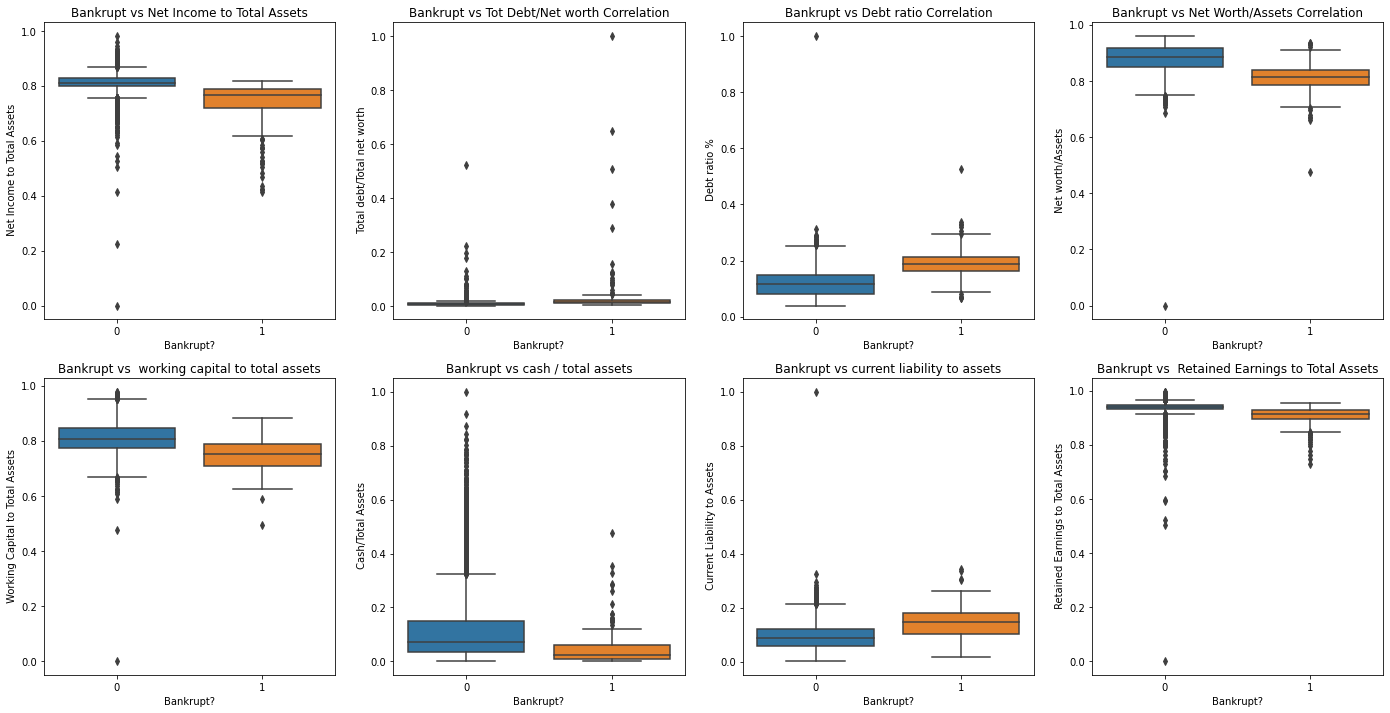

In [11]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(24,12))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=new_df, ax=axes[0,0])
axes[0,0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=new_df, ax=axes[0,1]) 
axes[0,1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=new_df, ax=axes[0,2])
axes[0,2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=new_df, ax=axes[0,3])  
axes[0,3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=new_df, ax=axes[1,0])
axes[1,0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=new_df, ax=axes[1,1])
axes[1,1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=new_df, ax=axes[1,2])
axes[1,2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=new_df, ax=axes[1,3])
axes[1,3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

In [12]:
labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'], axis = 1)

def log_trans(data):
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
    return data

data_norm = log_trans(new_df)

In [13]:
X_raw,X_test,y_raw,y_test  = train_test_split(data_norm, labels, test_size=0.2, stratify = labels, random_state = 42)

In [14]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_raw, X_test, y_raw, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:47<00:00,  1.63s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.80,0.85,0.85,0.86,0.10
NearestCentroid,0.88,0.82,0.82,0.91,0.09
Perceptron,0.90,0.82,0.82,0.93,0.13
GaussianNB,0.84,0.82,0.82,0.88,0.09
LinearDiscriminantAnalysis,0.96,0.73,0.73,0.96,0.29
AdaBoostClassifier,0.96,0.71,0.71,0.96,3.82
QuadraticDiscriminantAnalysis,0.70,0.69,0.69,0.79,0.33
LGBMClassifier,0.97,0.68,0.68,0.97,4.50
SGDClassifier,0.96,0.67,0.67,0.96,0.52


In [15]:
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in sss.split(X_raw,y_raw):
    X_train_sm, X_val_sm = X_raw.iloc[train_index], X_raw.iloc[test_index]
    y_train_sm, y_val_sm = y_raw.iloc[train_index], y_raw.iloc[test_index]
    
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

In [16]:
#Logistic Regression
accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

log_reg_sm = LogisticRegression()
#log_reg_params = {}
log_reg_params = {"penalty": ['l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model_reg = pipeline_reg.fit(X_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_
    prediction_reg = best_est_reg.predict(X_train_sm[val])
    
    accuracy_lst_reg.append(pipeline_reg.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg))
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg))
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg))
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))

print('Logistic Regression (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_reg)))
print("precision: {}".format(np.mean(precision_lst_reg)))
print("recall: {}".format(np.mean(recall_lst_reg)))
print("f1: {}".format(np.mean(f1_lst_reg)))

Logistic Regression (SMOTE) results:

accuracy: 0.8604711757343877
precision: 0.18168173430000714
recall: 0.7777777777777778
f1: 0.2919733481401895


In [17]:
#Random Forest Classifier
accuracy_lst_rfc = []
precision_lst_rfc = []
recall_lst_rfc = []
f1_lst_rfc = []
auc_lst_rfc = []

rfc_sm = RandomForestClassifier()
#rfc_params = {}
rfc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [42],
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],
              'bootstrap' : [True,False]}
    
    
rand_rfc = RandomizedSearchCV(rfc_sm, rfc_params, n_iter=4)

for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_rfc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_rfc)
    model_rfc = pipeline_rfc.fit(X_train_sm, y_train_sm)
    best_est_rfc = rand_rfc.best_estimator_
    prediction_rfc = best_est_rfc.predict(X_train_sm[val])
    
    accuracy_lst_rfc.append(pipeline_rfc.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_rfc.append(precision_score(y_train_sm[val], prediction_rfc))
    recall_lst_rfc.append(recall_score(y_train_sm[val], prediction_rfc))
    f1_lst_rfc.append(f1_score(y_train_sm[val], prediction_rfc))
    auc_lst_rfc.append(roc_auc_score(y_train_sm[val], prediction_rfc))
    
print('Random Forest (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_rfc)))
print("precision: {}".format(np.mean(precision_lst_rfc)))
print("recall: {}".format(np.mean(recall_lst_rfc)))
print("f1: {}".format(np.mean(f1_lst_rfc)))

Random Forest (SMOTE) results:

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


In [18]:
#XGBoost
accuracy_lst_xgb = []
precision_lst_xgb = []
recall_lst_xgb = []
f1_lst_xgb = []
auc_lst_xgb = []

xgb_sm = xgb.XGBClassifier(random_state = 42)
xgb_params = {'eta' : [0.1,0.01,0.001],  
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],     
              'alpha' : [0,0.5,1]}       
              
rand_xgb = RandomizedSearchCV(xgb_sm, xgb_params, n_iter=4)

for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_xgb = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_xgb) # SMOTE happens during Cross Validation not before..
    model_xgb = pipeline_xgb.fit(X_train_sm, y_train_sm)
    best_est_xgb = rand_xgb.best_estimator_
    prediction_xgb = best_est_xgb.predict(X_train_sm[val])
    
    accuracy_lst_xgb.append(pipeline_xgb.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_xgb.append(precision_score(y_train_sm[val], prediction_xgb))
    recall_lst_xgb.append(recall_score(y_train_sm[val], prediction_xgb))
    f1_lst_xgb.append(f1_score(y_train_sm[val], prediction_xgb))
    auc_lst_xgb.append(roc_auc_score(y_train_sm[val], prediction_xgb))
    
print('XGBoost (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_xgb)))
print("precision: {}".format(np.mean(precision_lst_xgb)))
print("recall: {}".format(np.mean(recall_lst_xgb)))
print("f1: {}".format(np.mean(f1_lst_xgb)))

XGBoost (SMOTE) results:

accuracy: 0.9935165200324221
precision: 0.8972701149425287
recall: 0.9851851851851852
f1: 0.9298245614035088


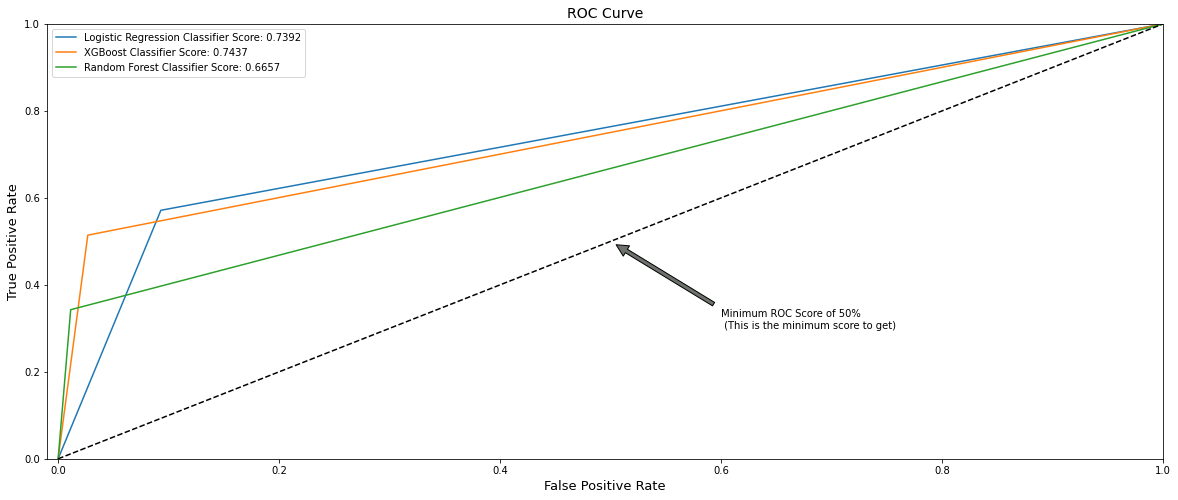

In [19]:
from sklearn.metrics import roc_curve

pred_reg_sm = best_est_reg.predict(X_val_sm)
smote_prediction_rfc = best_est_rfc.predict(X_val_sm)
smote_prediction_xgb = best_est_xgb.predict(X_val_sm)

log_fpr, log_tpr, log_thresold = roc_curve(y_val_sm, pred_reg_sm)
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_val_sm, smote_prediction_rfc)
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_val_sm, smote_prediction_xgb)

def graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_val_sm, pred_reg_sm)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_xgb)))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_rfc)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr)
plt.show()

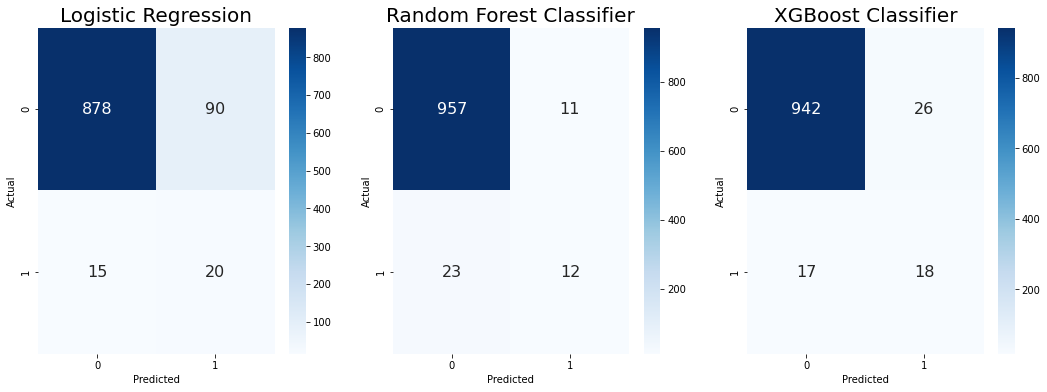

In [20]:
conf_mx0 = confusion_matrix(y_val_sm,pred_reg_sm)
conf_mx1 = confusion_matrix(y_val_sm,smote_prediction_rfc)
conf_mx2 = confusion_matrix(y_val_sm,smote_prediction_xgb)


heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

heat_cm2 = pd.DataFrame(conf_mx2, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm2.index.name = 'Actual'
heat_cm2.columns.name = 'Predicted'


f, ax = plt.subplots(1, 3, figsize=(18,6))
#f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0])
ax[0].set_title('Logistic Regression', fontsize = 20)
sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1])
ax[1].set_title('Random Forest Classifier', fontsize = 20)
sns.heatmap(heat_cm2, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[2])
ax[2].set_title('XGBoost Classifier', fontsize = 20)
                

plt.show()

In [26]:
test_pred_lr = best_est_reg.predict(X_test)

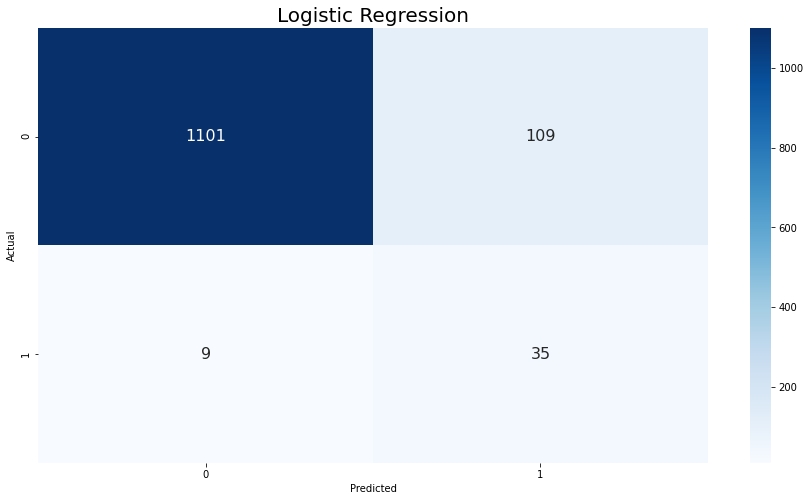

In [27]:
conf_mx0 = confusion_matrix(y_test,test_pred_lr)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

f, ax = plt.subplots(1, 1, figsize=(15,8))

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')
ax.set_title('Logistic Regression', fontsize = 20)

plt.show()

In [28]:
#Comparing classification reports for training and testing sets
label = ['Stable','Bankrupt']
print('Testing data report:\n')
print(classification_report(y_val_sm, pred_reg_sm, target_names=label))
print('')
print('')
print('')
print('Training data report:\n')
print(classification_report(y_test, test_pred_lr, target_names=label))

Testing data report:

              precision    recall  f1-score   support

      Stable       0.98      0.91      0.94       968
    Bankrupt       0.18      0.57      0.28        35

    accuracy                           0.90      1003
   macro avg       0.58      0.74      0.61      1003
weighted avg       0.96      0.90      0.92      1003




Training data report:

              precision    recall  f1-score   support

      Stable       0.99      0.91      0.95      1210
    Bankrupt       0.24      0.80      0.37        44

    accuracy                           0.91      1254
   macro avg       0.62      0.85      0.66      1254
weighted avg       0.97      0.91      0.93      1254

